In [1]:
import sys
sys.path.append('F:/study/ML_project/ML_AI_project_HuiShi') # --> change here

from functions import PCA, SVM, standard_scaler, read_data, cal_metrics
import numpy as np
import pandas as pd
import os
from PIL import Image

SEED = 1
np.random.seed(SEED)
RAND_STATE = 1
root = "F:/study/ML_project/ML_AI_project_HuiShi/LISA_traffic_light_detection.v3i.multiclass" # --> change here
train_folder_path, test_folder_path, train_labels, test_labels = read_data.read_data(root) # read the dataset

In [2]:
# pre-processing on the dataset
#new_size = (320, 240)
new_size = (160, 120)
#new_size = (640/3, 480/3) # 160 120
images_train = []
labels_train = []
# resize each image in the training set
for idx, row in train_labels.iterrows():
    image_path = os.path.join(train_folder_path, row['filename'])
    label = row.iloc[1:].values.astype(int)
    image = Image.open(image_path).convert('RGB').resize(new_size)
    image = np.array(image).ravel()
    images_train.append(image)
    labels_train.append(label)

images_train = np.array(images_train)
labels_train = np.array(labels_train)

images_test = []
labels_test = []
# resize each image in the test set
for idx, row in test_labels.iterrows(): 
    image_path = os.path.join(test_folder_path, row['filename'])
    label = row.iloc[1:].values.astype(int) 
    image = Image.open(image_path).convert('RGB').resize(new_size)
    image = np.array(image).ravel()
    images_test.append(image)
    labels_test.append(label)

images_test = np.array(images_test)
labels_test = np.array(labels_test)

# Standardize features by removing the mean and scaling to unit variance.
X_train_std, X_test_std = standard_scaler.standard_scaler(images_train, images_test)


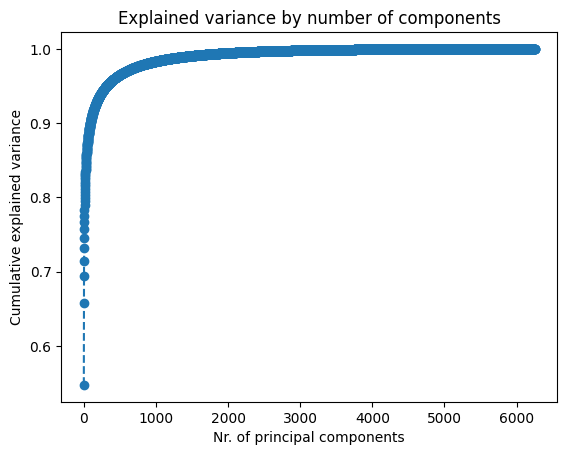

In [3]:
# Apply PCA without specifying the number of components to keep, in order to understand how many PCs are sufficient.
# Plot the explained variance ratio in a cumulative fashion, in order to visualize the cumulative variance plot.
PCA.plot_explained_variance(X_train_std, RAND_STATE)

c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.8400
Precision: 0.9254
Recall: 0.8620
F1 Score: 0.8809
Confusion Matrix for Label go:
[[352  69]
 [  7 472]]



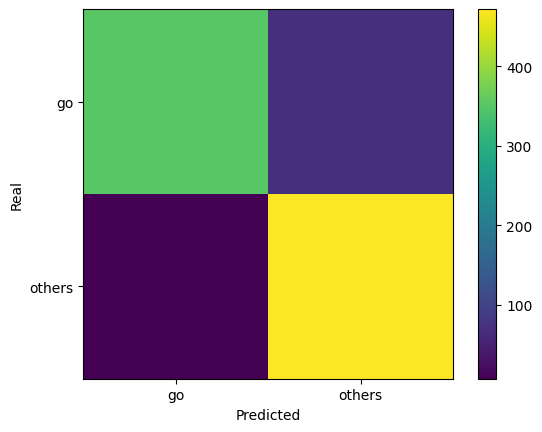

Confusion Matrix for Label stop:
[[502   0]
 [ 60 338]]



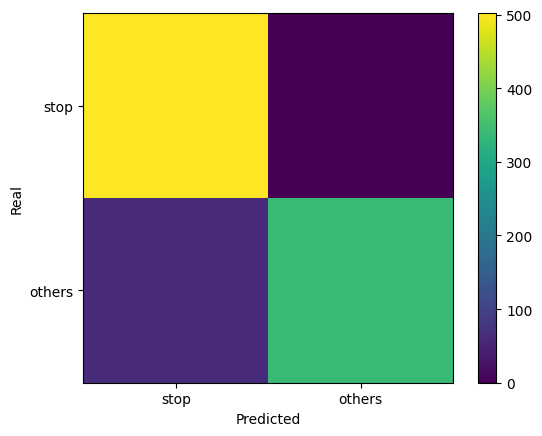

Confusion Matrix for Label warning:
[[784   0]
 [ 70  46]]



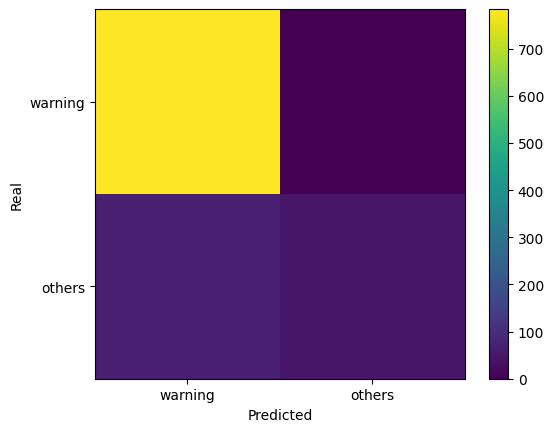

In [3]:
# Use the number of components needed to explain more than 80% of the variance in order to create a new PCA object and
# perform the final dimensionality reduction on the data.
n_components = 500
X_train_pca, X_test_pca = PCA.pca(n_components, RAND_STATE, X_train_std, X_test_std)

# SVM
# Multi target classification, fitting one classifier per target (one-vs-rest).
# Multi-output targets predicted across multiple predictors.
kernel = 'rbf'
gamma = 0.01
max_iteration = 1000
y_pred = SVM.multi_output_classifier_rbf(kernel, gamma, max_iteration, SEED, X_train_pca, labels_train, X_test_pca)

# print Accuracy, Precision, Recall, F1 Score
# Compute and plot a confusion matrix for each class (one-vs-rest)
cal_metrics.cal_metrics(labels_test, y_pred)